## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = pd.DataFrame(df)
df["Diff"] = df["High"] - df["Low"]
df = df[["Diff", "Volume", "Close"]]
df.head()

,Diff,Volume,Close
Date,,,
2010-06-29,1.492,93831500,4.778
2010-06-30,1.424,85935500,4.766
2010-07-01,1.130,41094000,4.392
2010-07-02,0.878,25699000,3.840
2010-07-06,0.834,34334500,3.222


df = pd.DataFrame(df)
df["Diff"] = df["High"] - df["Low"]
df = df[["Diff", "Close"]]
df.head()

In [6]:
df.corr()

,Diff,Volume,Close
Diff,1.000000,0.73029,0.699451
Volume,0.730290,1.00000,0.462500
Close,0.699451,0.46250,1.000000


In [7]:
train_data = df[:1640] #From 2010 to 2017
test_data = df[1640:] #From 2018 to 2019

In [8]:
#Standardizing the columns using Standard Scaler

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.drop(['Close'],axis=1)) #Predictor Variables(independant variable)
y = df['Close'].copy() # Target Variable (depdependant variable)

In [9]:
X_train = train_data[["Diff", "Volume"]]
Y_train = train_data["Close"]

X_test = test_data[["Diff", "Volume"]]
Y_test = test_data["Close"]

X_train = train_data[["Diff"]]
Y_train = train_data["Close"]

X_test = test_data[["Diff"]]
Y_test = test_data["Close"]

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [11]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Square Error (MSE): '+str(mean_squared_error(Y_pred, Y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(Y_pred, Y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(Y_pred, Y_test))))

Mean Square Error (MSE): 569.2241035925335
Mean Absolute Error(MAE): 20.604307832753847
Root Mean Square Error (RMSE): 23.85841787697863


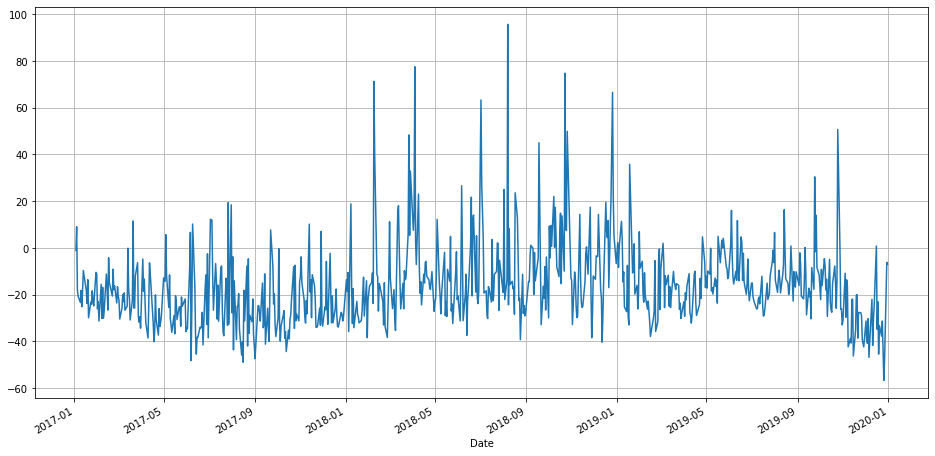

In [12]:
res = Y_pred - Y_test
res.plot(figsize = (16,8), grid = True)

KeyError: 'Close'

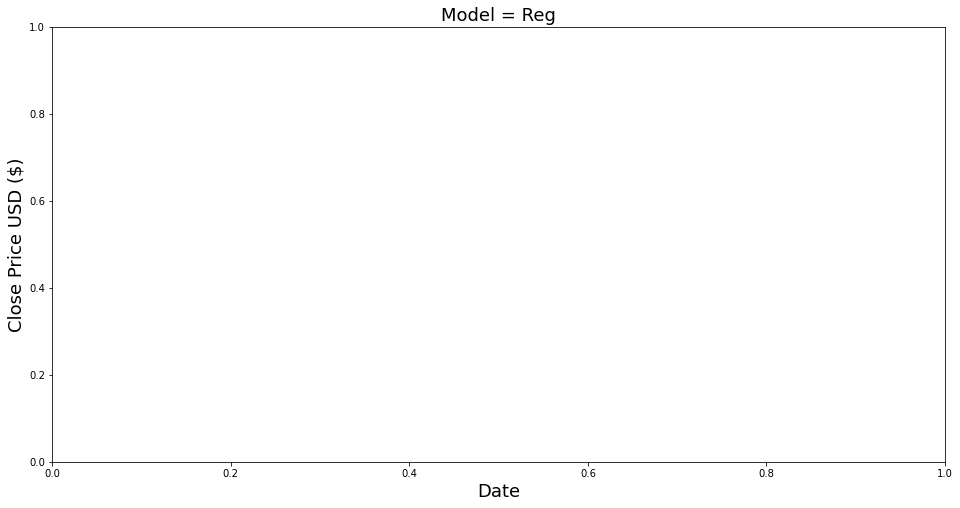

In [13]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = Reg', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(X_train['Close'])
plt.plot([['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = LSTM', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(trn['Close'])
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Visualize the test data

plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

train = pd.read_csv("train.csv", header = None)
test = pd.read_csv("test.csv", header = None)

X = train.drop([500],axis=1) #Predictor Variables(independant variable)
y = train[500].copy() #Target Variable (depdependant variable)

model = LinearRegression().fit(X,y)
pd.DataFrame(model.predict(test)).to_csv("Predictions.csv", index = False, header = False)

## Visualizing the Data

In [ ]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

## Calculations

#### Looks like EMA_3 has the best predictive power overall since it has the lowest RMSE value

In [ ]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Credit: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c